# Telco Customer Churn Analysis

This exploratory analysis explores factors contributing to customer churn using the Telco Customer Datasets.
The goal is to uncover patterns and behaviors associated with churn and suggest strategies to improve retention

## Data Overview & Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

from shapely.geometry import Point, Polygon
import geopandas as gpd

pd.set_option('display.max_columns', 100)

In [2]:
path = '/Users/joanne/Documents/Data Science Projects/Telco Customer Churn/Telecommunications_Industry/'
main = pd.read_excel(path+'CustomerChurn.xlsx')
demographic = pd.read_excel(path+'Telco_customer_churn_demographics.xlsx')
location = pd.read_excel(path+'Telco_customer_churn_location.xlsx')
population = pd.read_excel(path+'Telco_customer_churn_population.xlsx')
services = pd.read_excel(path+'Telco_customer_churn_services.xlsx')
status = pd.read_excel(path+'Telco_customer_churn_status.xlsx')
customer = pd.read_excel(path+'Telco_customer_churn.xlsx')




In [3]:
main.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
demographic.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [5]:
location.head()

,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [6]:
population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [7]:
services.head()

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [8]:
status.head()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [9]:
customer.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
## customer and main data contains parts of customers information from the other data set, 
## to utilize all customer information available, we'll merge all the available data together

In [11]:
for data in [main, demographic, location, population, services, status, customer]:
    data.columns = data.columns.str.replace(' ','')
for data in [ demographic, location, services, customer, status]:
    data.drop(columns=['Count'], inplace = True)

In [12]:
print(main.shape, customer.shape)

(7043, 21) (7043, 32)


In [13]:
df = pd.merge(demographic, location, on='CustomerID')
df = pd.merge(df, services, on='CustomerID')
df = pd.merge(df, status, on='CustomerID')

In [14]:
df.head()

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberofDependents,LocationID,Country,State,City,ZipCode,LatLong,Latitude,Longitude,ServiceID,Quarter_x,ReferredaFriend,NumberofReferrals,TenureinMonths,Offer,PhoneService,AvgMonthlyLongDistanceCharges,MultipleLines,InternetService,InternetType,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,StatusID,Quarter_y,SatisfactionScore,CustomerStatus,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnCategory,ChurnReason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,OXCZEW7397,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,IJKDQVSWH3522,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,SWSORB1252,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,FCCECI8494,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,BFKMZJAIE2285,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,SNAEQA8572,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,HEHUQY7254,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,EIMVJQBMT7187,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,LMBQNN3714,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,WIUHRF2613,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,EROZQXDUU4979,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,VRZYZI9978,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,CFEZBF4415,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,GEEYSJUHY6991,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,FDNAKX1688,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7043 non-null   object 
 1   Gender                         7043 non-null   object 
 2   Age                            7043 non-null   int64  
 3   Under30                        7043 non-null   object 
 4   SeniorCitizen                  7043 non-null   object 
 5   Married                        7043 non-null   object 
 6   Dependents                     7043 non-null   object 
 7   NumberofDependents             7043 non-null   int64  
 8   LocationID                     7043 non-null   object 
 9   Country                        7043 non-null   object 
 10  State                          7043 non-null   object 
 11  City                           7043 non-null   object 
 12  ZipCode                        7043 non-null   i

In [16]:
df[df.ChurnCategory.isnull()]['ChurnLabel'].unique()

array(['No'], dtype=object)

In [17]:
df[df.ChurnLabel=='No'].ChurnCategory.unique()

array([nan], dtype=object)

In [18]:
df.describe()

,Age,NumberofDependents,ZipCode,Latitude,Longitude,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,ChurnValue,ChurnScore,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.071134,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755
std,16.750352,0.962802,1856.768045,2.468929,2.154425,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000


In [19]:
df.duplicated().sum()

0

In [20]:
df.StatusID.nunique()

7043

In [21]:
print(df.Country.nunique())
print(df.State.nunique())
print(df.City.nunique())
print(df.Quarter_x.nunique())
print(df.Quarter_y.nunique())

1
1
1106
1
1


In [22]:
print(df.Country.unique())
print(df.State.unique())
print(df.Quarter_x.unique())
print(df.Quarter_y.unique())

['United States']
['California']
['Q3']
['Q3']


In [23]:
df.drop(columns=['Country','State','Quarter_x','Quarter_y'], inplace = True)

## Exploratory Data Analysis

### Tenure Distribution

Text(0.5, 0, 'Month')

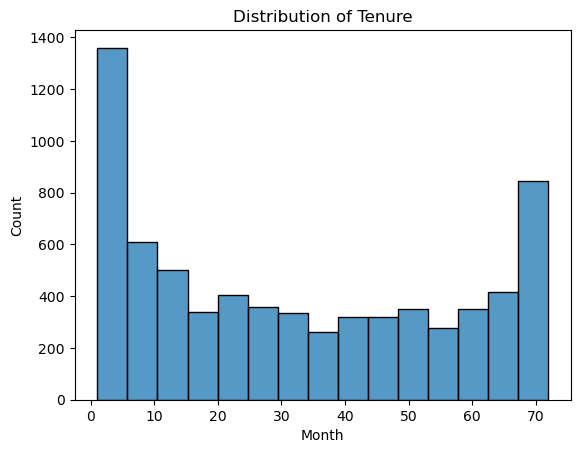

In [24]:
sns.histplot(data=df, x='TenureinMonths')
plt.title('Distribution of Tenure')
plt.xlabel('Month')

In [25]:
df['TenureGroup'] = pd.cut(df['TenureinMonths'], bins=[0,6,12,24,48,72], 
                          labels=['0-6','7-12','13-24','25-48','48+'])
grouped = df.groupby('TenureGroup')['ChurnLabel'].value_counts(normalize=True).unstack()

In [26]:
grouped.index

CategoricalIndex(['0-6', '7-12', '13-24', '25-48', '48+'], categories=['0-6', '7-12', '13-24', '25-48', '48+'], ordered=True, dtype='category', name='TenureGroup')

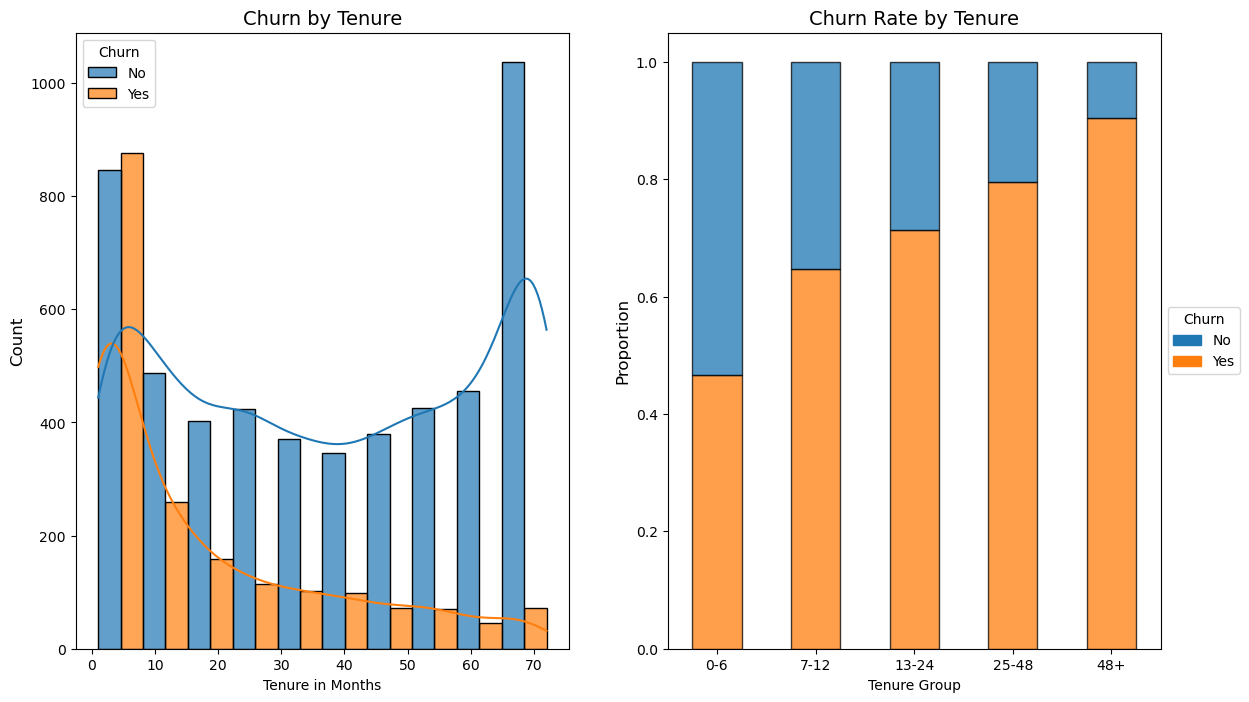

In [27]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))
sns.histplot(data=df, x='TenureinMonths', hue='ChurnLabel',multiple='dodge',kde=True,bins=10, alpha=0.7,
            hue_order=['No','Yes'], ax=ax1)
ax1.legend_.set_title('Churn')
ax1.set_title('Churn by Tenure', size=14)
ax1.set_xlabel('Tenure in Months')
ax1.set_ylabel('Count', size= 12)

palette = sns.color_palette() 
grouped.plot(kind='bar',stacked=True,  ax=ax2, color =  [palette[1], palette[0]], alpha=0.75)
for container in ax2.containers:
    for bar in container:
        bar.set_edgecolor('black')     
        bar.set_linewidth(1)   

no_patch = mpatches.Patch(color='#1f77b4', label='No')     
yes_patch = mpatches.Patch(color='#ff7f0e', label='Yes')
ax2.set_title('Churn Rate by Tenure', size=14)
ax2.set_xlabel('Tenure Group')
ax2.set_ylabel('Proportion', size = 12)
ax2.legend(handles=[no_patch, yes_patch], title='Churn', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax2.set_xticklabels(labels = grouped.index, rotation=0);
plt.show()

In [28]:
grouped

ChurnLabel,No,Yes
TenureGroup,,
0-6,0.466667,0.533333
7-12,0.646648,0.353352
13-24,0.712891,0.287109
25-48,0.796110,0.203890
48+,0.904868,0.095132


### Tenure and Churn Behavior
There is a clear negative relationship between tenure and churn — as tenure increases, the likelihood of churn decreases. The first few months are especially critical for customer retention.

**0–6 months:**

* Highest churn rate — over 50% of new customers churn within this window.
* Interpretation: Customers are most vulnerable during onboarding.
* Opportunity: Focus on improving the first-touch experience, setting clear expectations, and driving early engagement to reduce churn.

**6–12 months:**

* Churn declines, but remains relatively high.
* Insight: Customers who remain past 6 months show stronger retention potential, signaling an early behavioral threshold.

**12–24 months:**

* Moderate churn rate — customers begin to stabilize and build familiarity with the service.

**24–48 months:**

* Churn is significantly lower, reflecting increased customer loyalty and satisfaction.

**48–72 months:**

* Very low churn — these are highly loyal, long-term customers who have likely formed habitual use or strong product attachment.

### Contract Type

<AxesSubplot:xlabel='Contract', ylabel='count'>

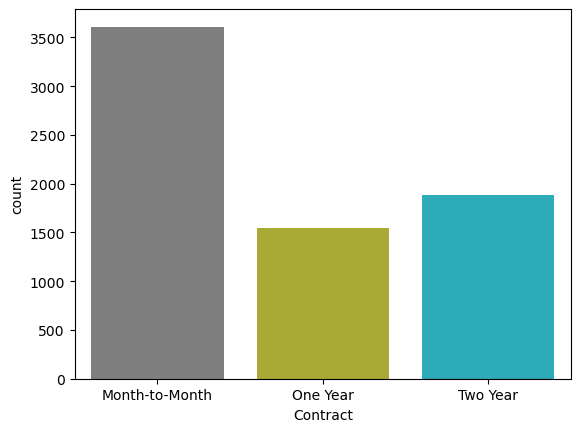

In [29]:
sns.countplot(data=df, x='Contract', palette= [palette[7], palette[8], palette[9]])

In [30]:
df.Contract.value_counts(normalize=True)

Month-to-Month    0.512566
Two Year          0.267358
One Year          0.220077
Name: Contract, dtype: float64

In [31]:
df.groupby(['Contract']).ChurnLabel.value_counts()

Contract        ChurnLabel
Month-to-Month  No            1955
                Yes           1655
One Year        No            1384
                Yes            166
Two Year        No            1835
                Yes             48
Name: ChurnLabel, dtype: int64

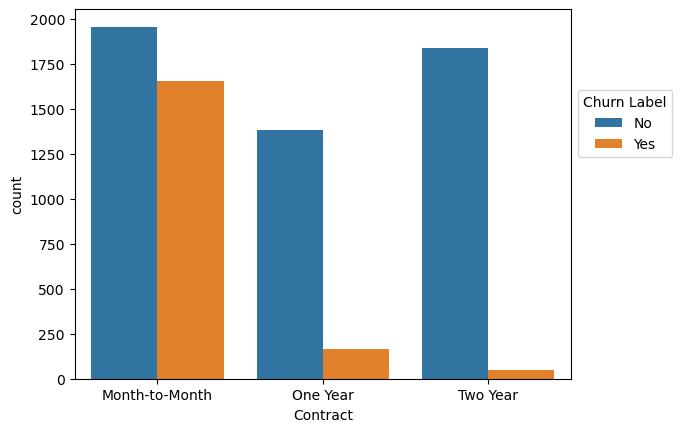

In [32]:
sns.countplot(data = df, x='Contract', hue='ChurnLabel', hue_order=(['No', 'Yes']))
plt.legend(title='Churn Label', bbox_to_anchor=(1.0, 0.8))
plt.show()

### Contract Type and Churn Behavior

Month-to-month contracts exhibit significantly higher churn rates compared to longer-term agreements.

**Month-to-Month Customers:**

* Show the highest churn — likely due to the lack of commitment and ease of exit.
* May be more price-sensitive or responsive to short-term dissatisfaction, such as service issues or competitor promotions.
* Represent a key segment for proactive engagement and retention efforts.

**Customers on One-Year or Two-Year Contracts:**

* Exhibit much lower churn, likely due to:
* Higher satisfaction or perceived value, or
* Switching friction — such as early termination fees, bundled perks, or loyalty incentives.
* These customers are more stable and offer a longer runway for building lifetime value.

### Interaction of Tenure x Contract Type

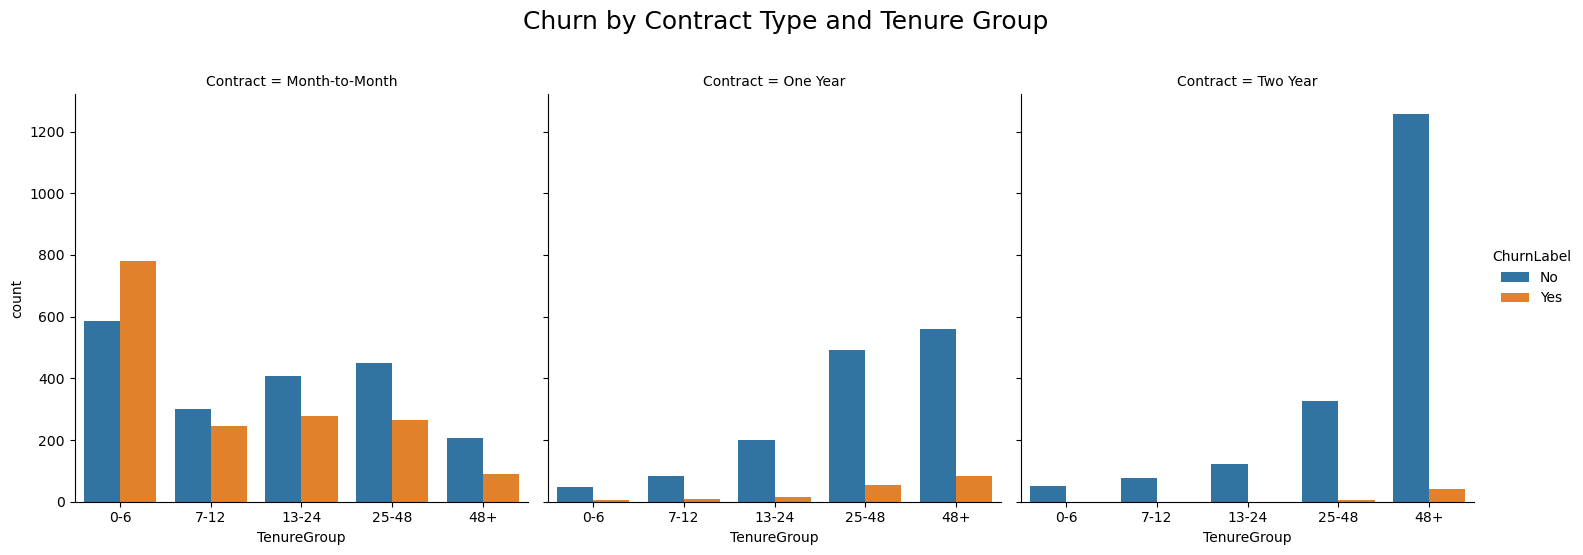

In [33]:
sns.catplot(data = df, kind='count',
           x='TenureGroup', hue='ChurnLabel', col='Contract', hue_order = ['No','Yes'])
plt.suptitle("Churn by Contract Type and Tenure Group", fontsize=18, y=1.1)
plt.show()

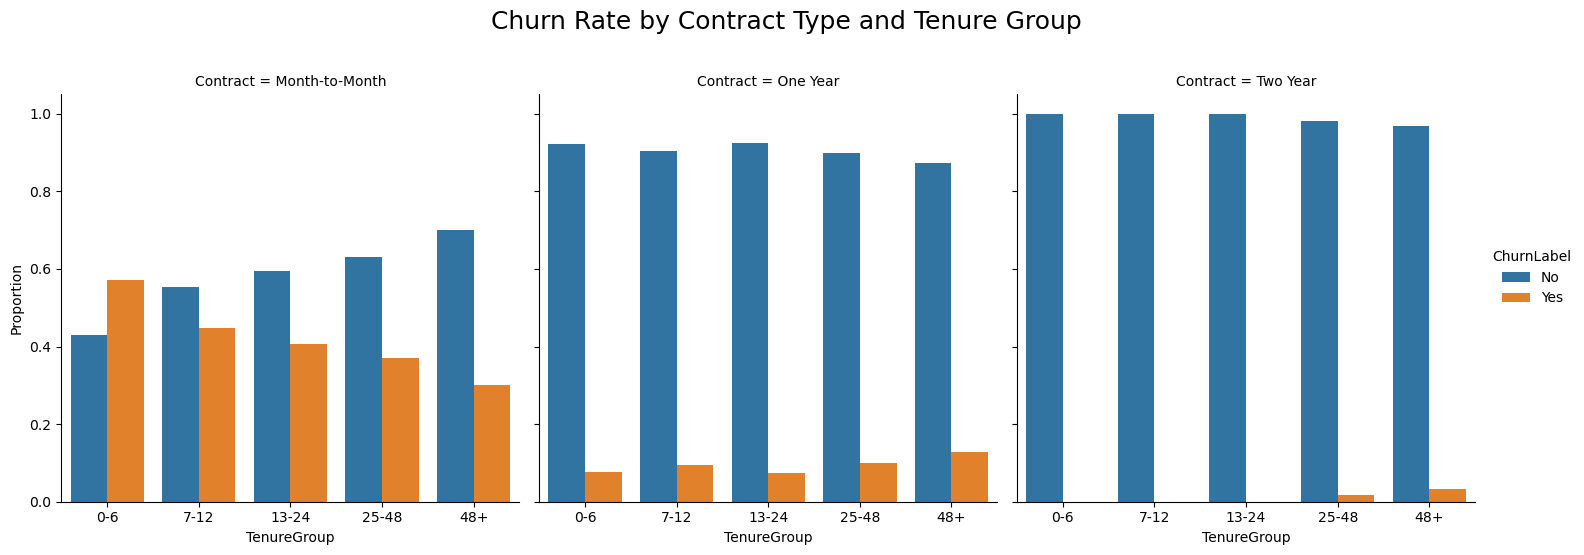

In [34]:
# Create normalized proportions
normalized = (
    df.groupby(['Contract', 'TenureGroup', 'ChurnLabel'])
    .size()
    .groupby(level=[0,1])
    .apply(lambda x: x / x.sum())
    .reset_index(name='Proportion')
)

# Plot
sns.catplot(
    data=normalized, kind='bar',
    x='TenureGroup', y='Proportion', hue='ChurnLabel', 
    col='Contract', hue_order=['No', 'Yes'],
    palette={'No': '#1f77b4', 'Yes': '#ff7f0e'}
)

plt.suptitle("Churn Rate by Contract Type and Tenure Group", fontsize=18, y=1.1)
plt.show()

### Interaction Between Tenure and Contract Type
Churn patterns vary significantly when examining tenure and contract type together:

**Month-to-Month Contracts:**

* Consistently show the highest churn rates across all tenure groups, with especially elevated churn in the first 6 months.
* Even customers with 2+ years of tenure on month-to-month plans experience higher churn than peers on fixed-term contracts.
* This suggests that contract flexibility continues to impact churn, regardless of how long a customer has been with the company.

**One-Year and Two-Year Contracts:**

* Show much lower churn rates, reinforcing the stability provided by longer-term commitments.
* For one-year contracts, churn is modest and spread across tenure levels.
* For two-year contracts, churn is almost nonexistent during the initial contract period and only begins to appear after the contract term ends — likely due to termination penalties or strong incentives to stay.

**Strategic Opportunity:**

* Over half (51%) of customers are on month-to-month contracts, which are associated with higher churn.
* This presents an opportunity to conduct A/B testing on marketing interventions (e.g., targeted promotions, loyalty perks) to encourage upgrades to one- or two-year contracts.
* Testing different incentive structures could help identify effective strategies for reducing churn among high-risk segments.

### Age

In [35]:
df['AgeGroup'] = pd.cut(df.Age, bins=[18,30,50,65,80], 
                  labels=['18-30','31-50','51-65','65+'])
agegrouped = df.groupby('AgeGroup').ChurnLabel.value_counts(normalize=True).unstack()
agegrouped= agegrouped[['Yes','No']]

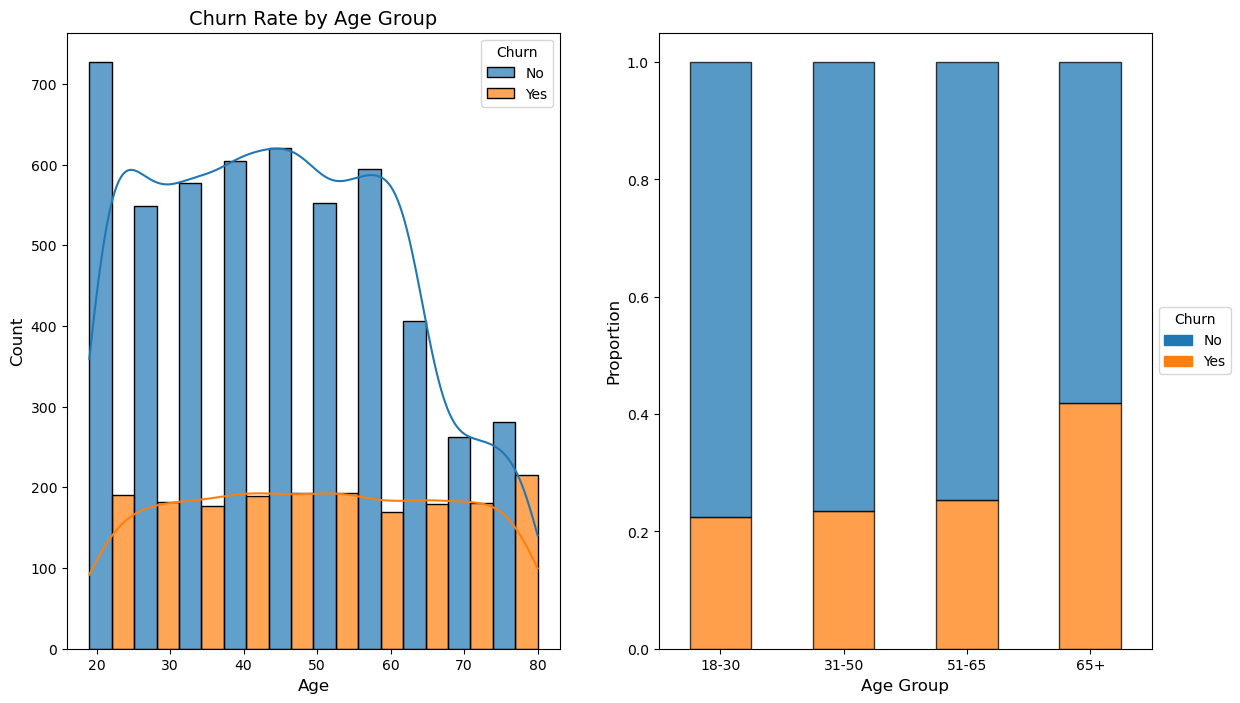

In [36]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))
sns.histplot(data=df, x='Age', hue='ChurnLabel',multiple='dodge',kde=True,bins=10, alpha=0.7,
            hue_order=['No','Yes'], ax=ax1)
ax1.set_title('Churn by Age', size=14)
ax1.set_xlabel('Age', size=12)
ax1.set_ylabel('Count', size=12)
ax1.legend_.set_title('Churn')


agegrouped.plot(kind='bar',stacked=True,  ax=ax2, color =  [palette[1], palette[0]], alpha=0.75)
for container in ax2.containers:
    for bar in container:
        bar.set_edgecolor('black')     
        bar.set_linewidth(1)   

no_patch = mpatches.Patch(color='#1f77b4', label='No')     
yes_patch = mpatches.Patch(color='#ff7f0e', label='Yes')
ax1.set_title('Churn Rate by Age Group', size=14)
ax2.set_xlabel('Age Group', size=12)
ax2.set_ylabel('Proportion', size=12)
ax2.set_xticklabels(labels=agegrouped.index, rotation = 0)

ax2.legend(handles=[no_patch, yes_patch], title='Churn', loc='center left', bbox_to_anchor=(1.0, 0.5))

### Churn by Age Group
Churn behavior is largely consistent across age groups, except for customers aged 65 and over, indicating a distinct pattern in this segment.

**Customers Aged 65 and Over:**

* Show the highest churn rates of any age group.
* This may point to usability challenges, changing needs, or financial or lifestyle shifts (e.g., retirement, relocation).
* Suggests a need for targeted support or tailored engagement strategies to retain older users.

**Younger Customers (<30 and 30–50):**

* Have lower and relatively stable churn rates.
* This could indicate a stronger product-market fit, greater tech fluency, or higher engagement levels.

**Key Insight:**

* The churn pattern for older users is distinct, suggesting a “one-size-fits-all” retention approach may not be effective.
* There's an opportunity to explore age-specific interventions — such as simplified interfaces, personalized communication, or flexible plan options — to better meet the needs of older customers.

### Age x Contract Type

Could the high churn for 65+ group due to type of contracts they usually sign up?

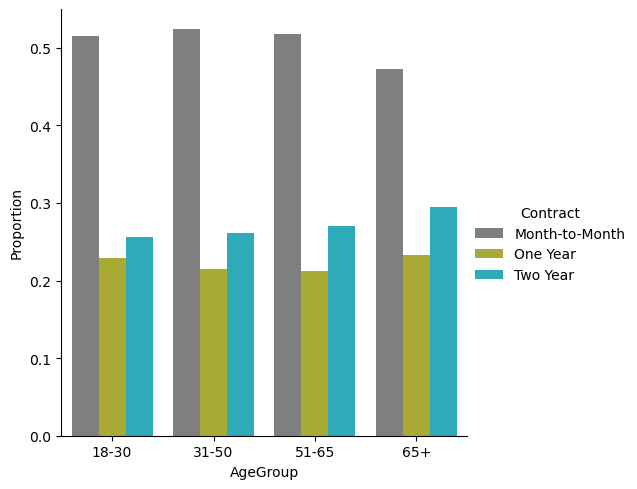

In [37]:
AgexContract = (
    df.groupby(['Contract', 'AgeGroup'])
    .size()
    .groupby(level=[1])
    .apply(lambda x: x / x.sum())
    .reset_index(name='Proportion')
)

sns.catplot(
    data=AgexContract, kind='bar',
    x='AgeGroup', y='Proportion', 
    hue='Contract', palette= [palette[7], palette[8], palette[9]]
)

In [38]:
AgexContract

,Contract,AgeGroup,Proportion
0,Month-to-Month,18-30,0.515370
1,Month-to-Month,31-50,0.523846
2,Month-to-Month,51-65,0.517558
3,Month-to-Month,65+,0.472248
4,One Year,18-30,0.228908
5,One Year,31-50,0.215000
6,One Year,51-65,0.212318
7,One Year,65+,0.233302
8,Two Year,18-30,0.255723
9,Two Year,31-50,0.261154


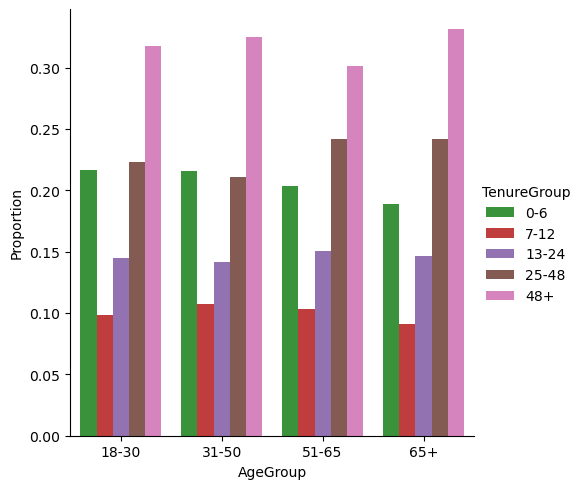

In [39]:
AgexTenure = (
    df.groupby(['TenureGroup', 'AgeGroup'])
    .size()
    .groupby(level=[1])
    .apply(lambda x: x / x.sum())
    .reset_index(name='Proportion')
)

sns.catplot(
    data=AgexTenure, kind='bar',
    x='AgeGroup', y='Proportion', 
    hue='TenureGroup', palette= [palette[2], palette[3], palette[4], palette[5], palette[6]]
)

### Investigating Churn Drivers in the 65+ Age Group
To better understand the elevated churn rate among customers aged 65 and over, I explored whether contract type or tenure distribution might explain this pattern.

**Contract Type:**

* The 65+ group has the lowest proportion of customers on month-to-month contracts, compared to other age groups.
* This suggests that contract type does not explain the higher churn — in fact, churn is higher despite their more stable contract choices.

**Tenure:**

* The distribution of tenure is also similar across age groups.
* The higher churn in the 65+ segment is not due to a disproportionate number of new customers.

**Conclusion:**

* Neither contract type nor tenure appears to explain the elevated churn among seniors.
* This suggests other underlying factors — such as usability, service expectations, financial constraints, or lifestyle changes — may be contributing to the distinct churn behavior in this segment.

### Monthly Charges

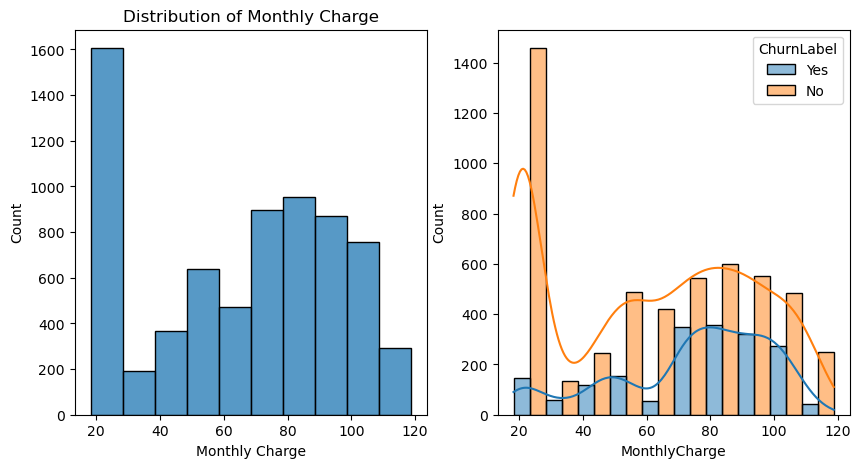

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='MonthlyCharge', bins=10, ax=ax1)
ax1.set_title('Distribution of Monthly Charge')
ax1.set_xlabel('Monthly Charge')
sns.histplot(data=df, x='MonthlyCharge', bins=10, hue='ChurnLabel', multiple='dodge', kde=True, ax=ax2)
plt.show()

### Churn by Monthly Charge

The relationship between monthly charges and churn is not strictly linear, revealing some notable patterns:

* Customers with the lowest monthly charges exhibit the lowest churn rates.
* Churn increases with monthly charges, stabilizing around 30%.
* A distinct dip in churn appears around the $60 mark, where churn rates drop noticeably.
* Beyond this point, churn rises again, reaching up to 40% for higher-tier plans.
* Interestingly, customers in the highest monthly charge bracket show lower churn rates, possibly indicating higher loyalty or perceived value.

**Interpretation:**

* These patterns suggest the presence of distinct customer segments with varying behaviors and expectations.
* The dip around $60 may represent a "sweet spot" where customers feel they receive optimal value.
* Low-charge customers could be more price-sensitive yet satisfied with basic offerings, while high-charge customers may be more invested in the service or benefit from premium support, contributing to lower churn.

#### Monthly Charge x Age

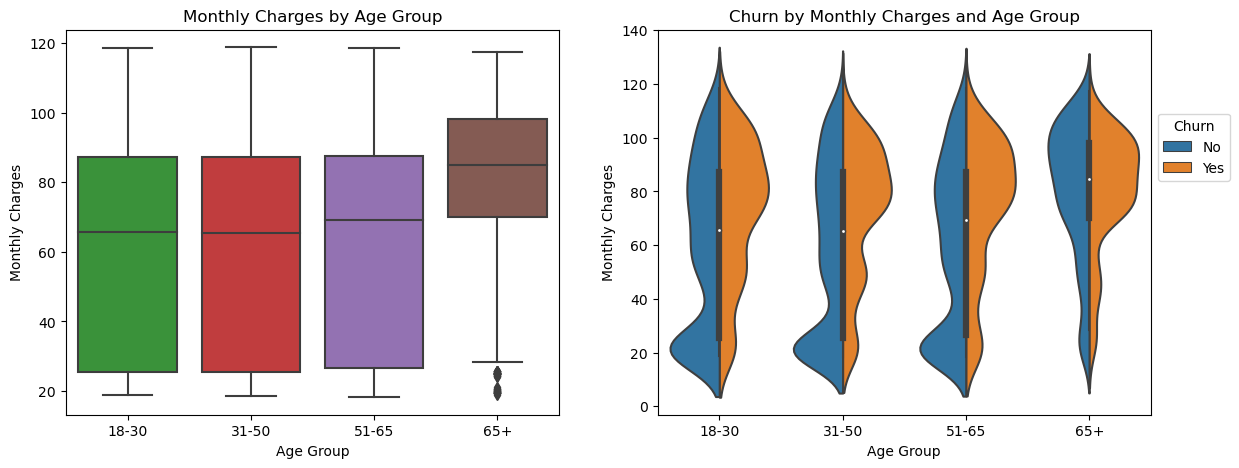

In [41]:
figure, (ax1, ax2)  = plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(data=df, x = 'AgeGroup', y='MonthlyCharge', ax=ax1,
            palette= [palette[2], palette[3], palette[4], palette[5], palette[6]])
ax1.set_title('Monthly Charges by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Monthly Charges')
sns.violinplot(data=df, x='AgeGroup', y='MonthlyCharge', hue='ChurnLabel', split=True, hue_order = ['No','Yes'],
              ax=ax2)
ax2.set_title('Churn by Monthly Charges and Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Monthly Charges')
ax2.legend(title='Churn', bbox_to_anchor=(1.0, 0.8))



plt.show()

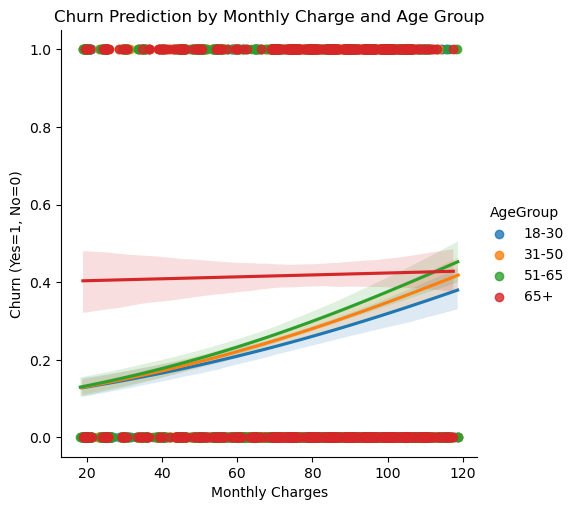

In [42]:
sns.lmplot(data=df, x='MonthlyCharge', y='ChurnValue', hue='AgeGroup', logistic=True, aspect=1)
plt.title('Churn Prediction by Monthly Charge and Age Group')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn (Yes=1, No=0)')
plt.show()


### Churn by Age Group and Monthly Charge
* Customers aged 65 and older tend to have higher monthly charges compared to other age groups.
* In younger age groups, churn generally increases with higher monthly charges, suggesting a price sensitivity dynamic.
* However, within the 65+ group, the distribution of monthly charges is similar for both churned and retained customers — indicating that price may not be a key factor influencing churn for this segment.

This suggests that churn behavior among the 65+ group may be driven by factors other than price — such as service satisfaction, ease of use, or lifestyle changes. Unlike younger customers who appear more sensitive to cost, older customers might place greater value on reliability, customer support, or specific features. Understanding these unique needs could help tailor retention strategies for this demographic.

## Internet Service

In [44]:
churnbyinternet = df[df.InternetService=='Yes'].groupby('InternetType').ChurnLabel.value_counts(normalize=True).unstack()

In [45]:
churnbyinternet

ChurnLabel,No,Yes
InternetType,,
Cable,0.743373,0.256627
DSL,0.814165,0.185835
Fiber Optic,0.592751,0.407249


In [46]:
churnbyinternet

ChurnLabel,No,Yes
InternetType,,
Cable,0.743373,0.256627
DSL,0.814165,0.185835
Fiber Optic,0.592751,0.407249


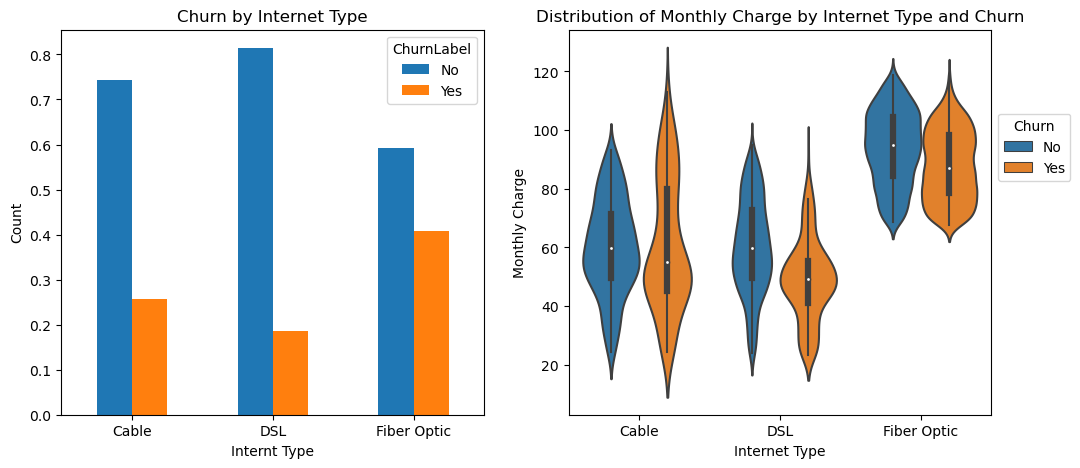

In [47]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
churnbyinternet.plot(kind='bar', ax=ax1)
ax1.set_title("Churn by Internet Type")
ax1.set_xlabel("Internt Type")
ax1.set_ylabel("Count")
ax1.set_xticklabels(labels = churnbyinternet.index, rotation=0);
sns.violinplot(data=df[df['InternetService'] != 'No'], x='InternetType',
               y='MonthlyCharge', hue='ChurnLabel', ax=ax2, hue_order=['No','Yes'],
              order=['Cable','DSL','Fiber Optic'])
ax2.set_title("Distribution of Monthly Charge by Internet Type and Churn")
ax2.set_xlabel("Internet Type")
ax2.set_ylabel("Monthly Charge")
ax2.legend(title='Churn', bbox_to_anchor=(1.0, 0.8))
plt.show()

### Internet Type
Among customers with internet service, Fiber Optic users have the highest churn rate compared to those using DSL or Cable. However, the violin plot reveals that monthly charge distributions for churned and non-churned Fiber Optic users are quite similar, with some churn even occurring among lower-paying customers. This suggests that factors beyond price — such as service quality or customer expectations — may be contributing to churn in this group.

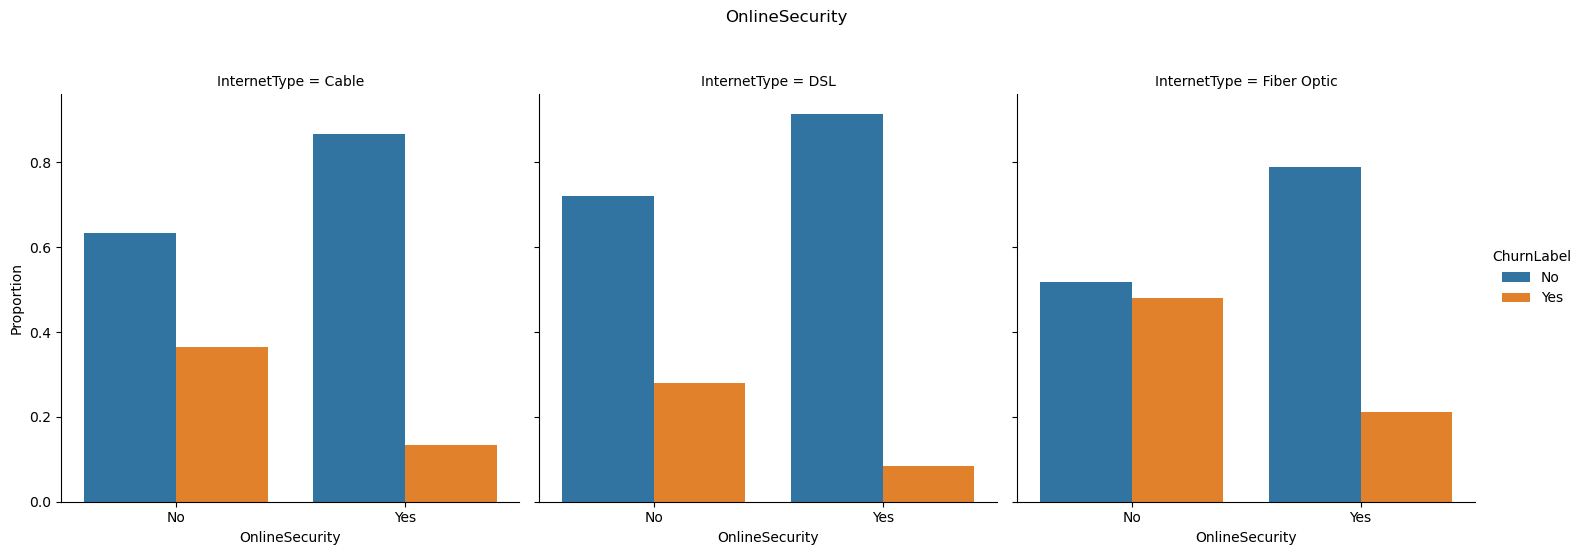

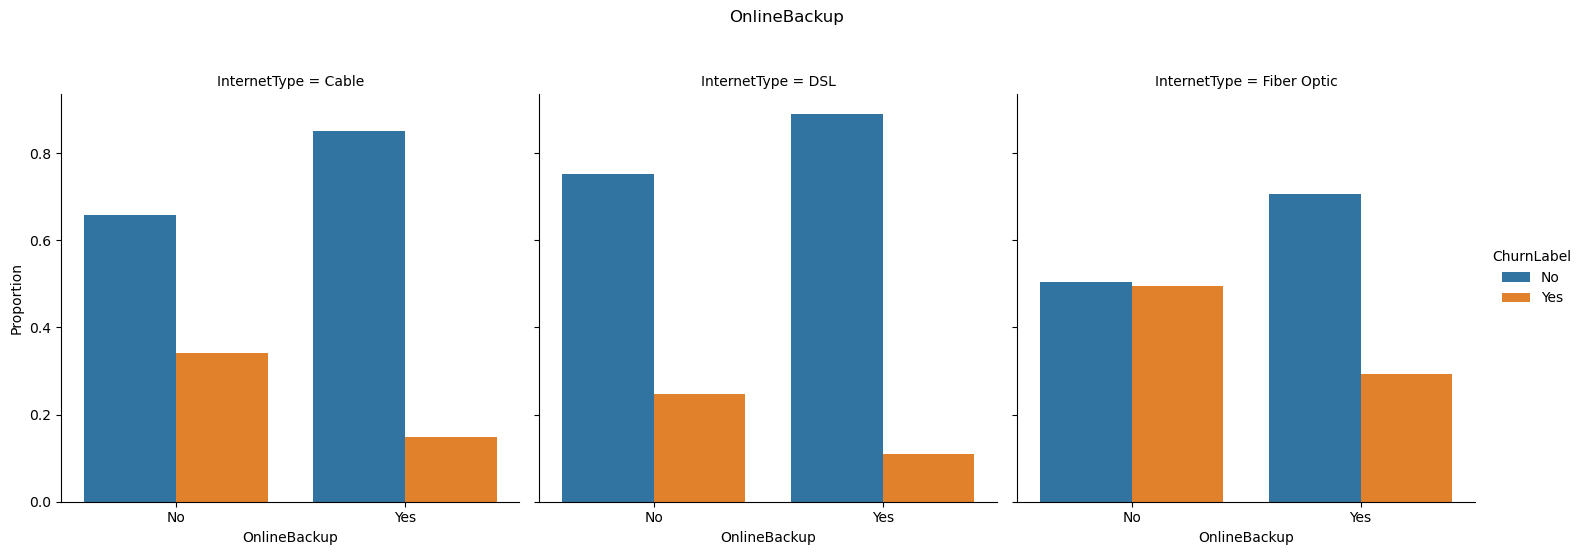

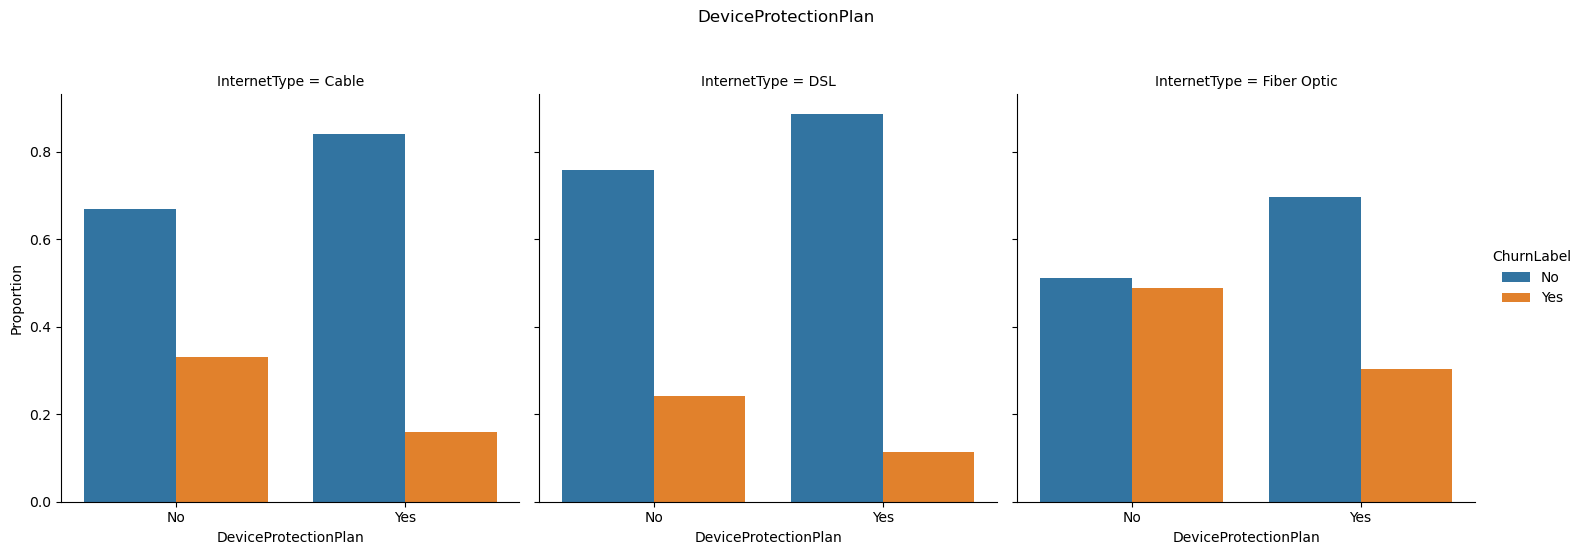

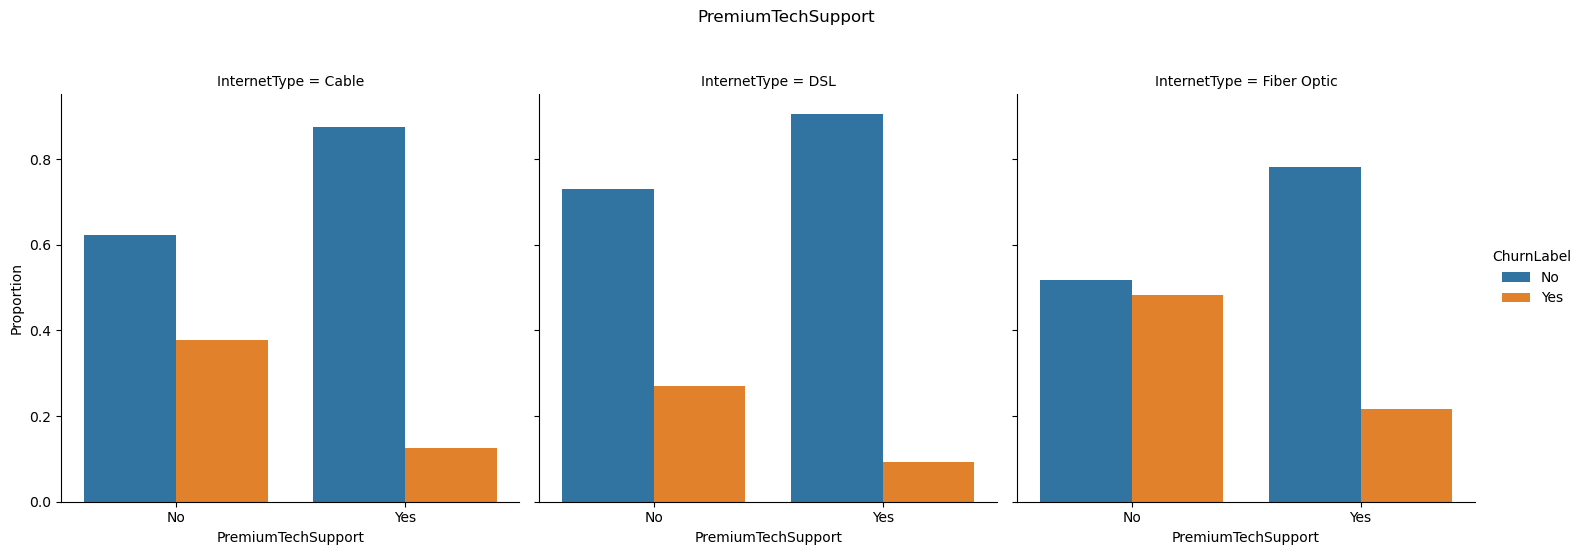

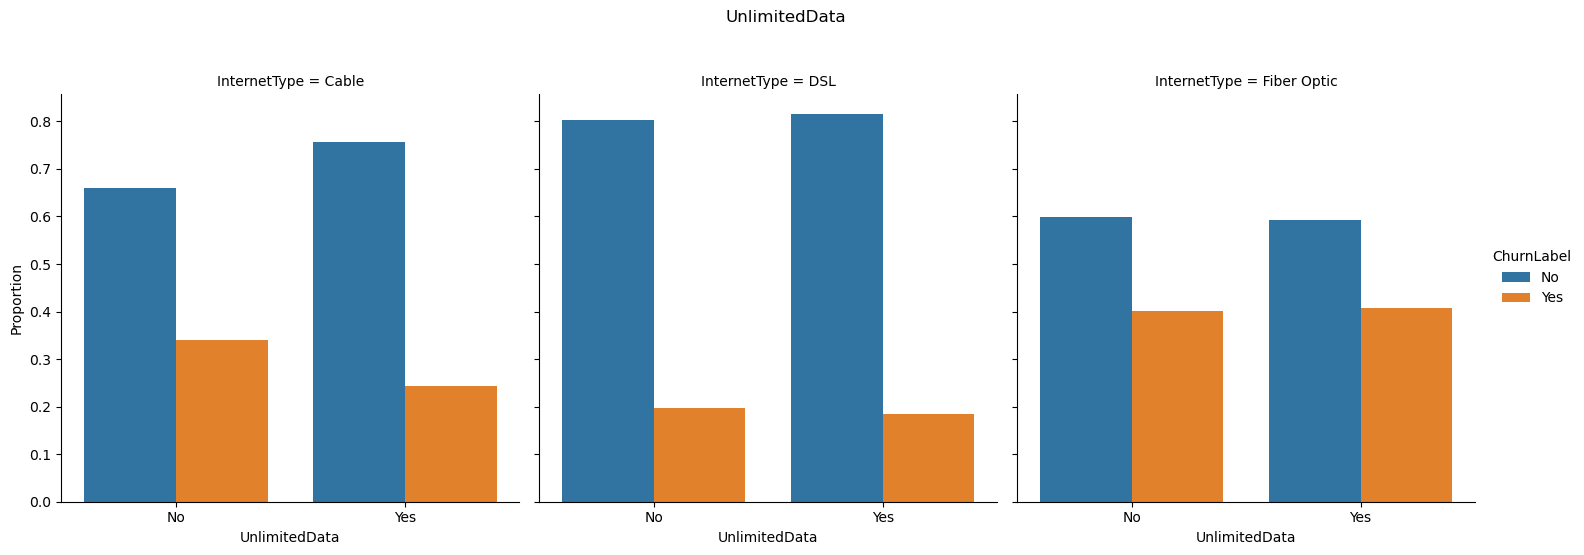

In [48]:
addonservices = ['OnlineSecurity','OnlineBackup', 'DeviceProtectionPlan', 
'PremiumTechSupport','UnlimitedData']
for service in addonservices:
    temp = (df[df.InternetService=='Yes'].groupby([service,'InternetType','ChurnLabel'])
            .size()
            .groupby(level=[0,1])
            .apply(lambda x: x / x.sum())
            .reset_index(name='Proportion')
           )
    #print(temp)
    sns.catplot(
        data=temp, kind='bar',
        x=service, y='Proportion', col='InternetType',
        hue='ChurnLabel'
    )
    plt.suptitle(service, y=1.1)
    plt.show()

### Add On Services

When examining the impact of add-on services, customers who subscribe to additional services overall tend to have lower churn rates, suggesting that bundling may enhance customer retention. However, unlimited data stands out as an exception — churn rates are similar between those who pay for unlimited data and those who don’t, indicating that this particular add-on may not influence customer loyalty in the same way as other services.

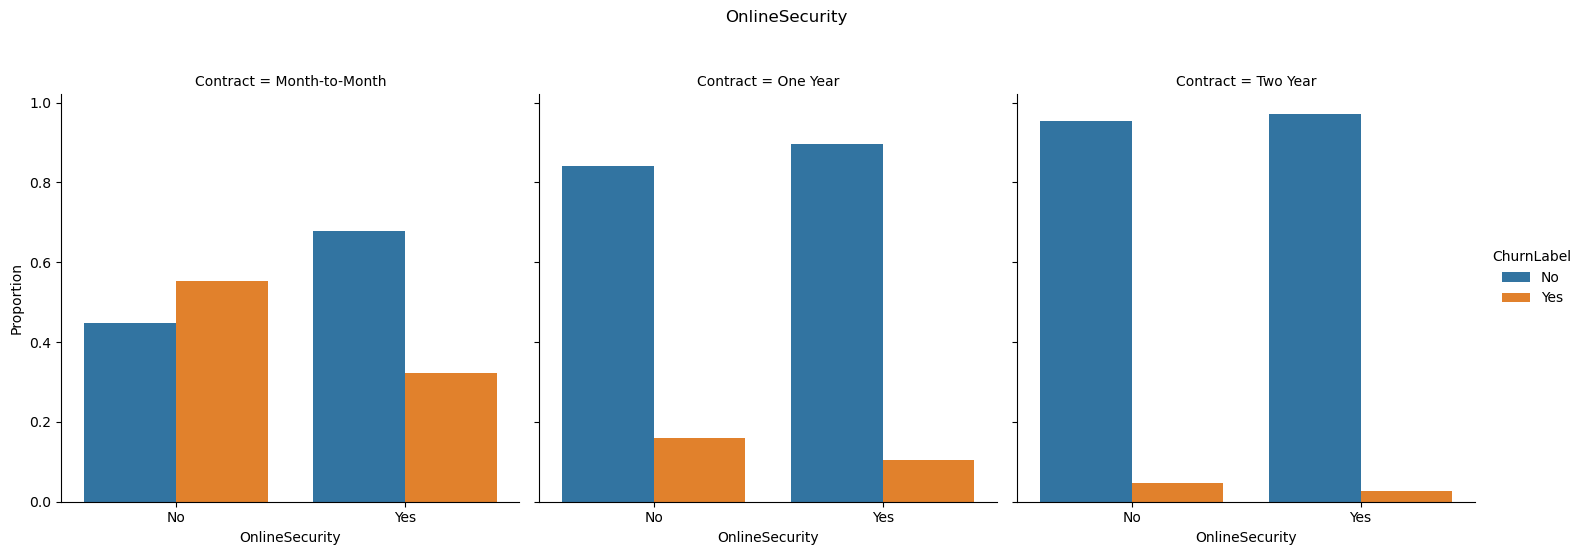

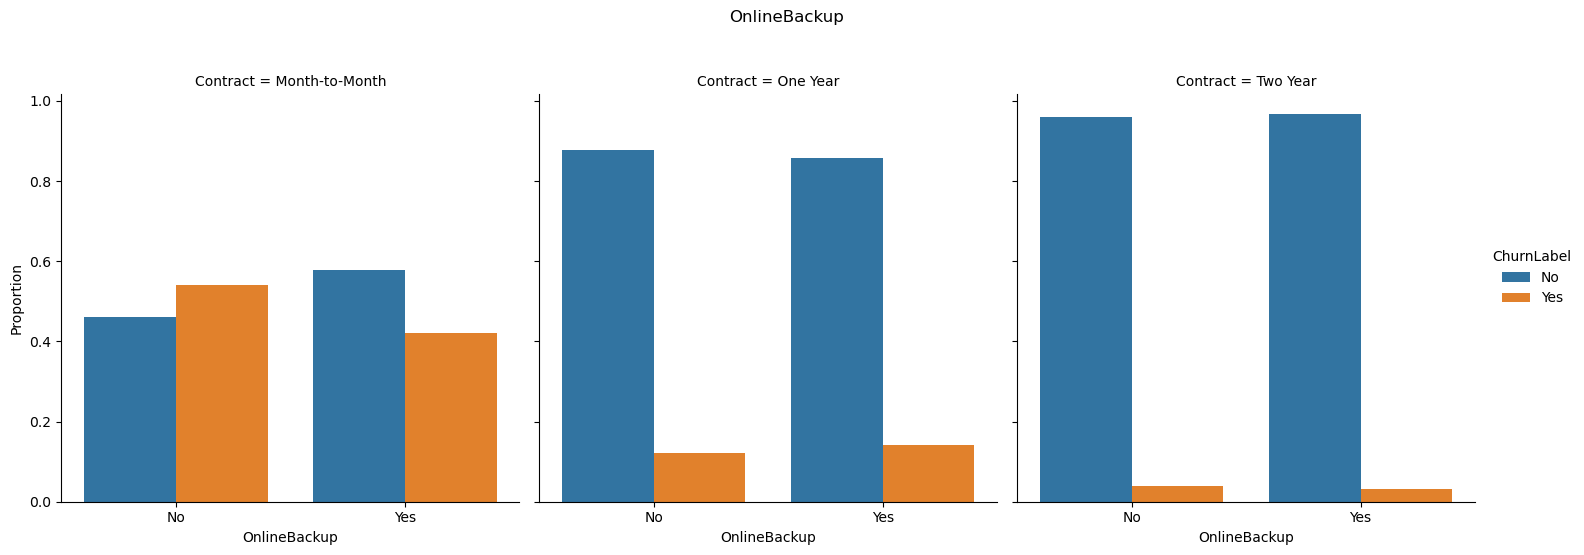

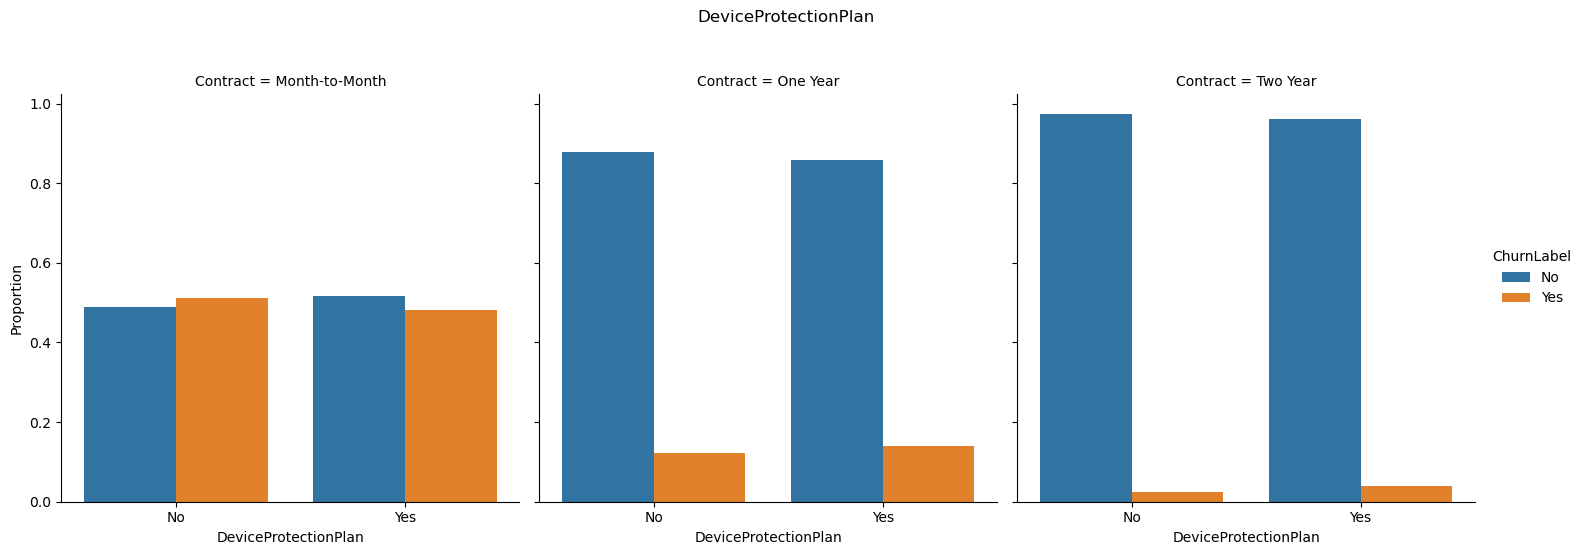

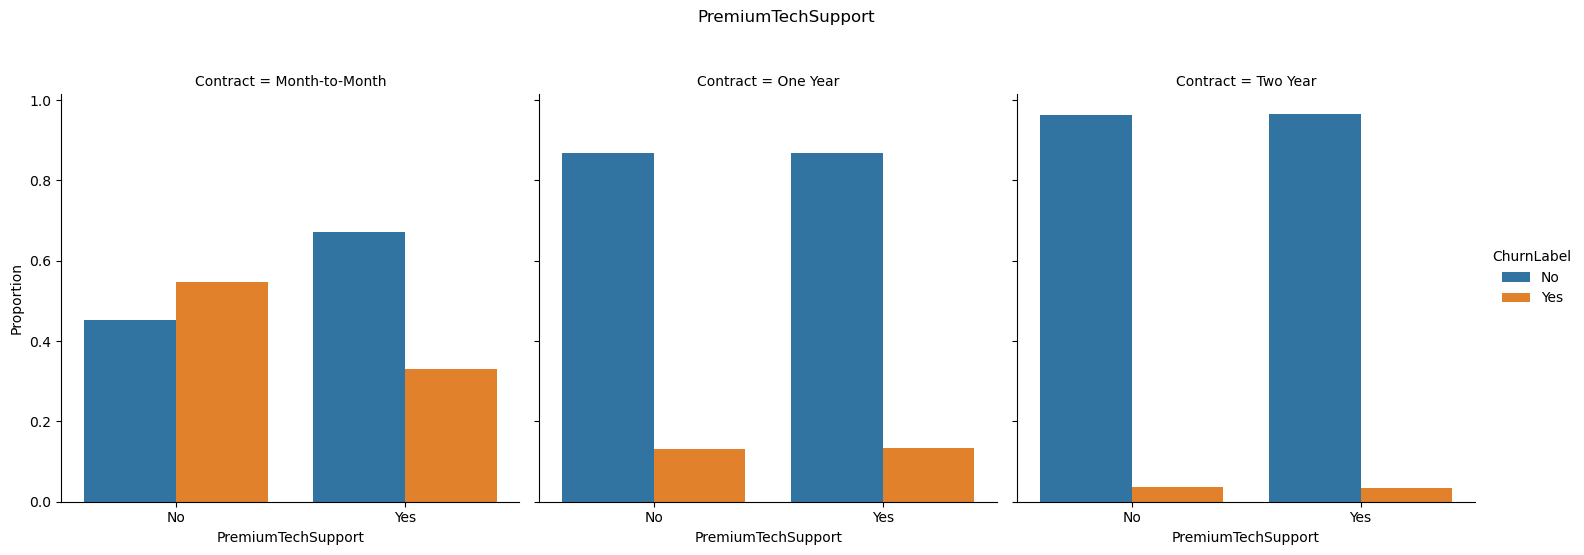

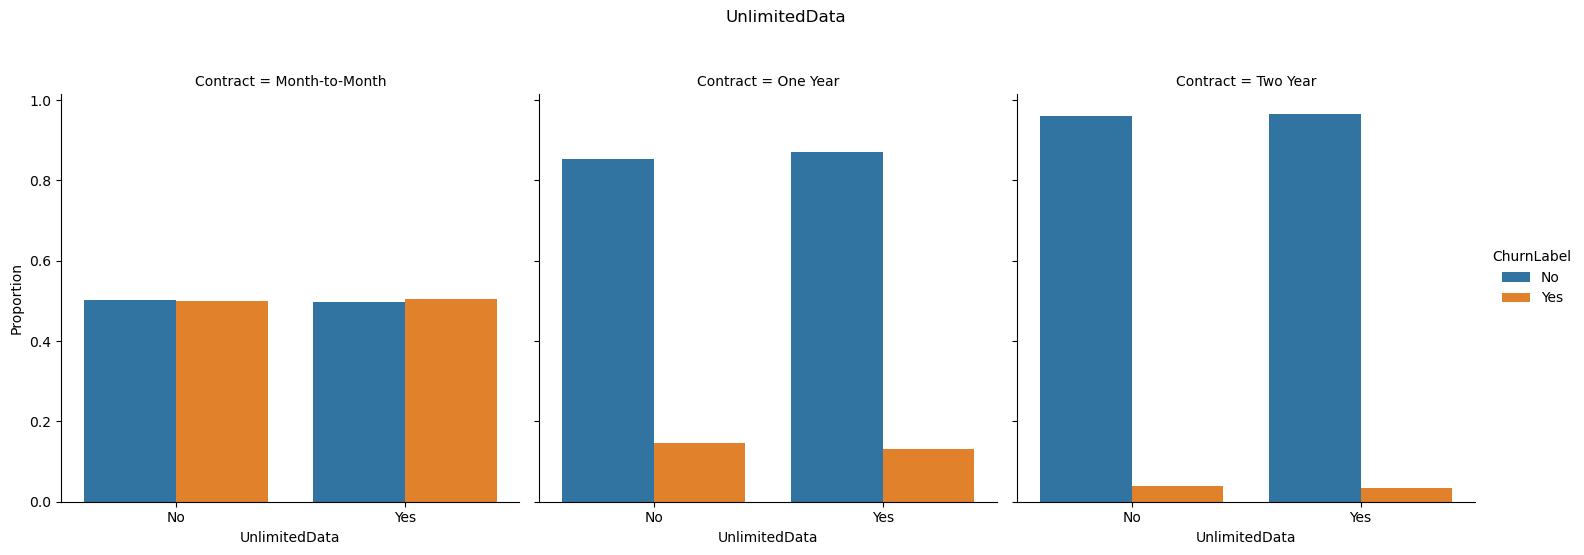

In [49]:
addonservices = ['OnlineSecurity','OnlineBackup', 'DeviceProtectionPlan', 
'PremiumTechSupport','UnlimitedData']
for service in addonservices:
    temp = (df[df.InternetService=='Yes'].groupby([service,'Contract','ChurnLabel'])
            .size()
            .groupby(level=[0,1])
            .apply(lambda x: x / x.sum())
            .reset_index(name='Proportion')
           )
    #print(temp)
    sns.catplot(
        data=temp, kind='bar',
        x=service, y='Proportion', col='Contract',
        hue='ChurnLabel'
    )
    plt.suptitle(service, y=1.1)
    plt.show()

When examining the impact of add-on services on churn while controlling for contract type, the effect of these services is less pronounced for customers on one-year and two-year contracts, likely due to the reduced overall churn driven by early termination penalties. Among month-to-month customers, however, clearer patterns emerge:
Unlimited data and device protection plans show minimal impact on churn.
In contrast, customers who opted into online security, online backup, or premium tech support exhibit notably lower churn rates, suggesting these services may enhance perceived value or stickiness for more flexible contract holders.

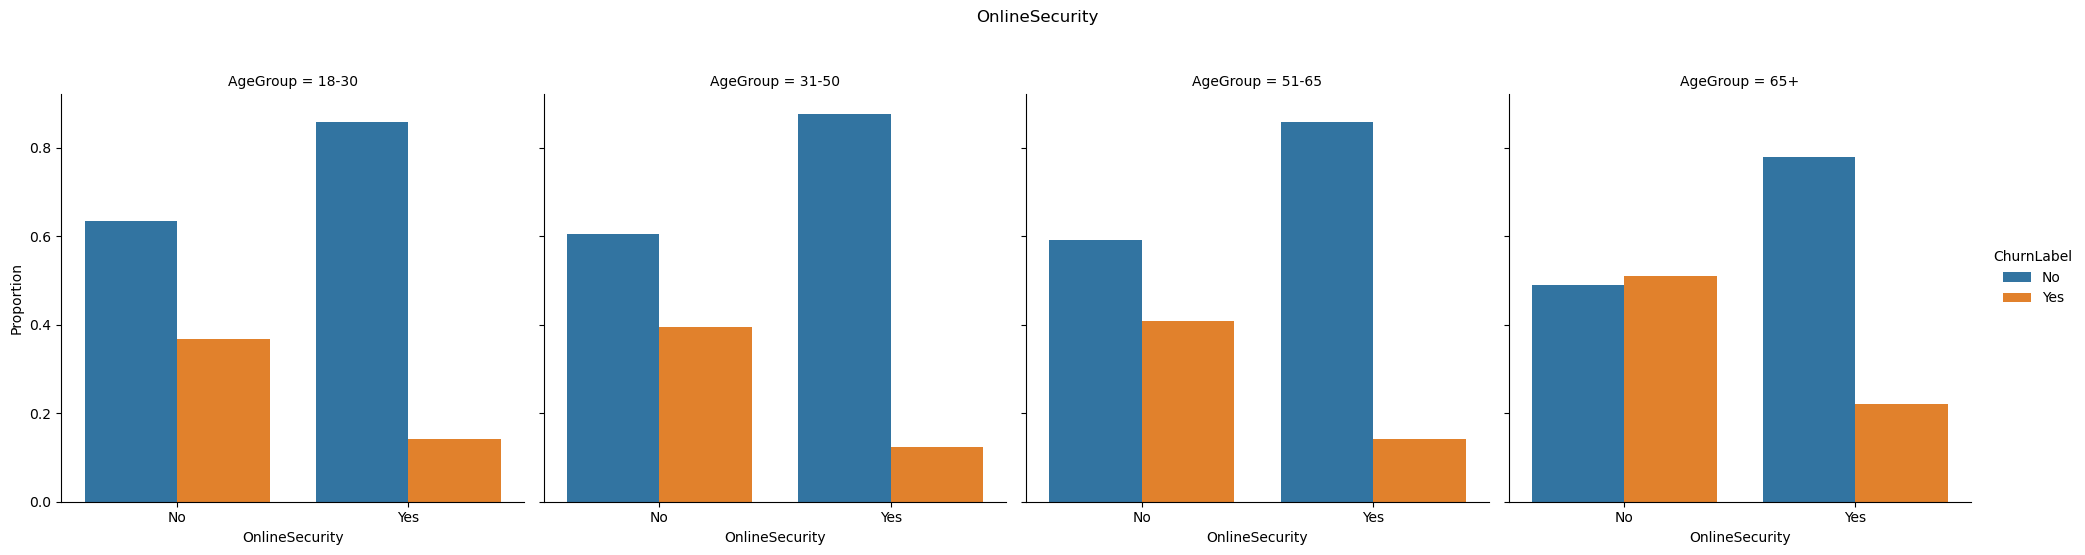

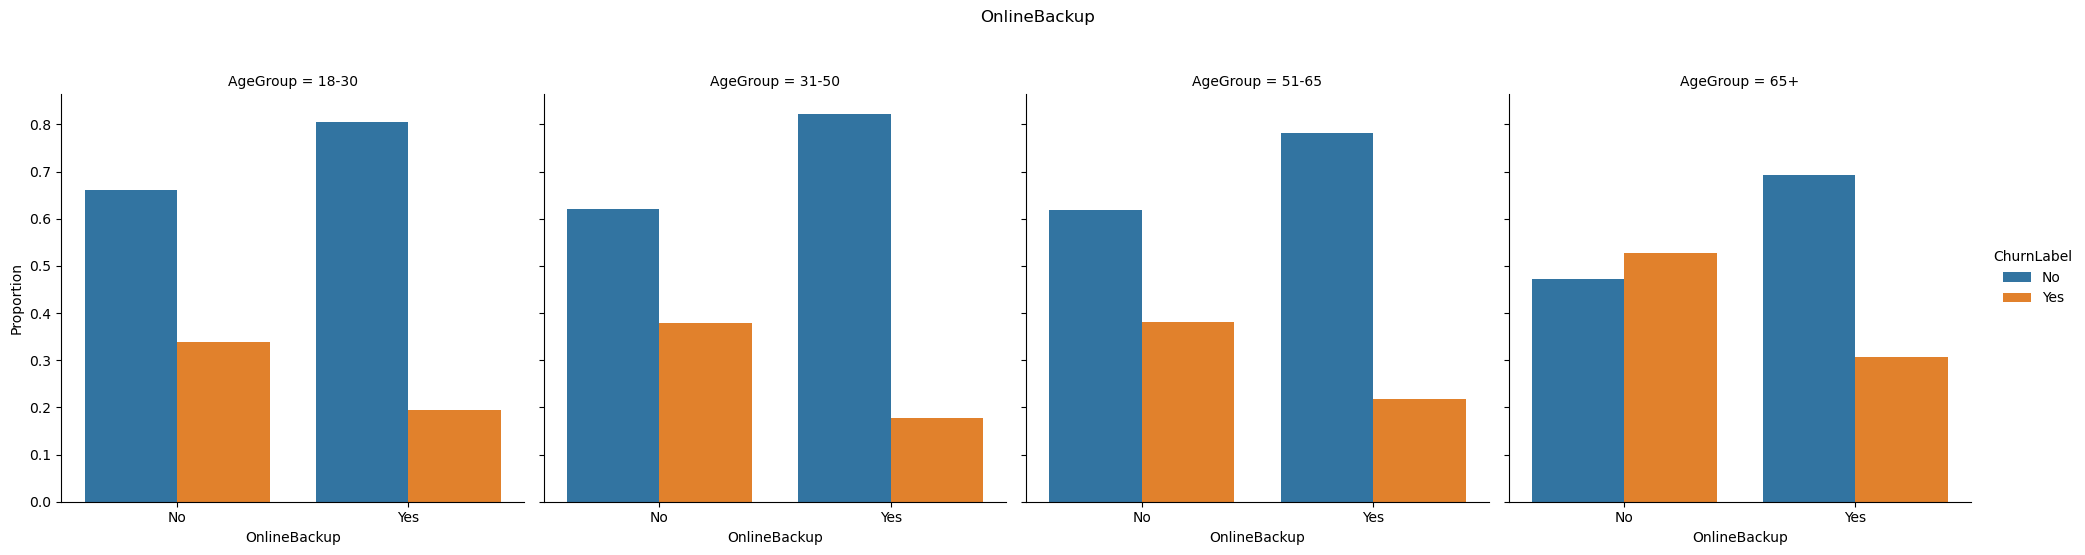

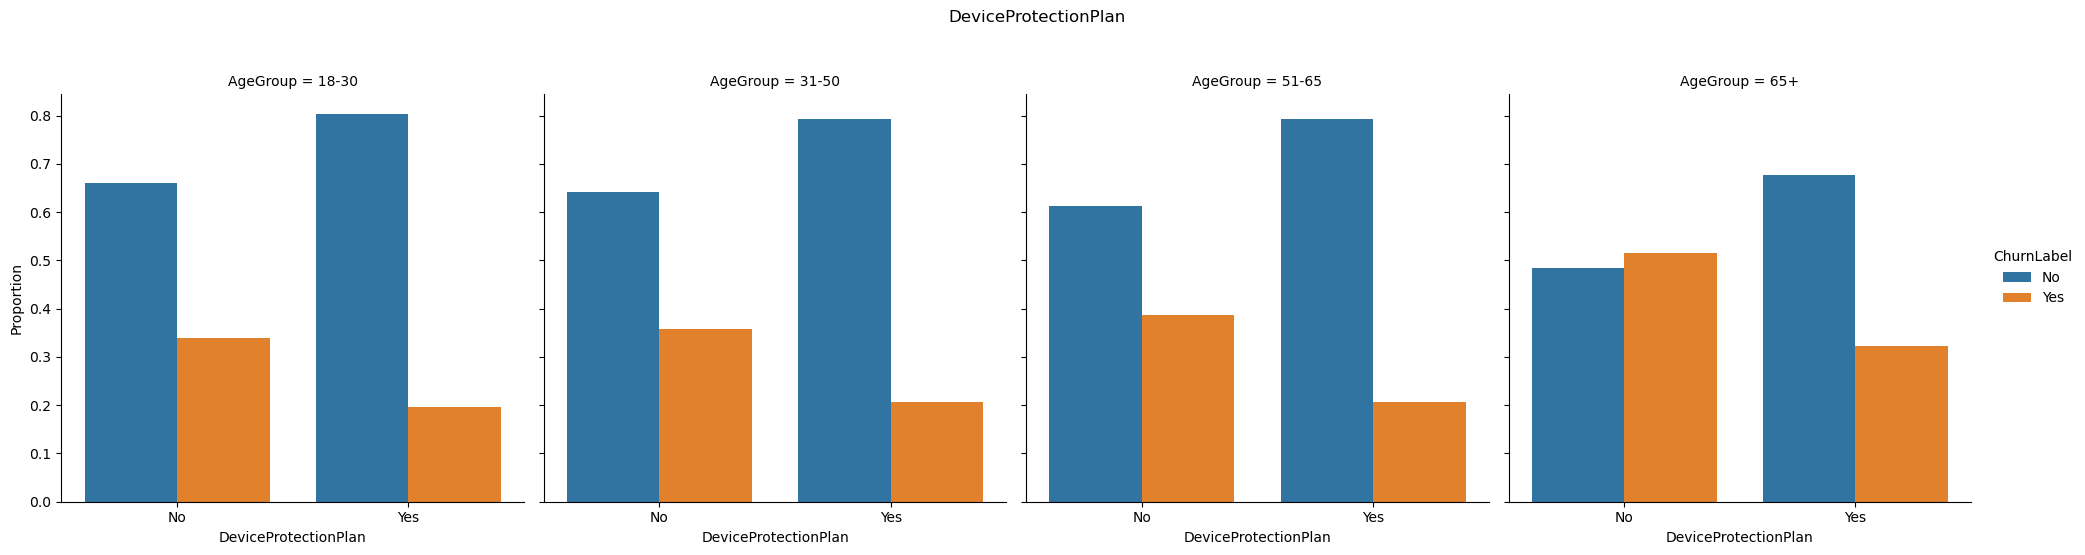

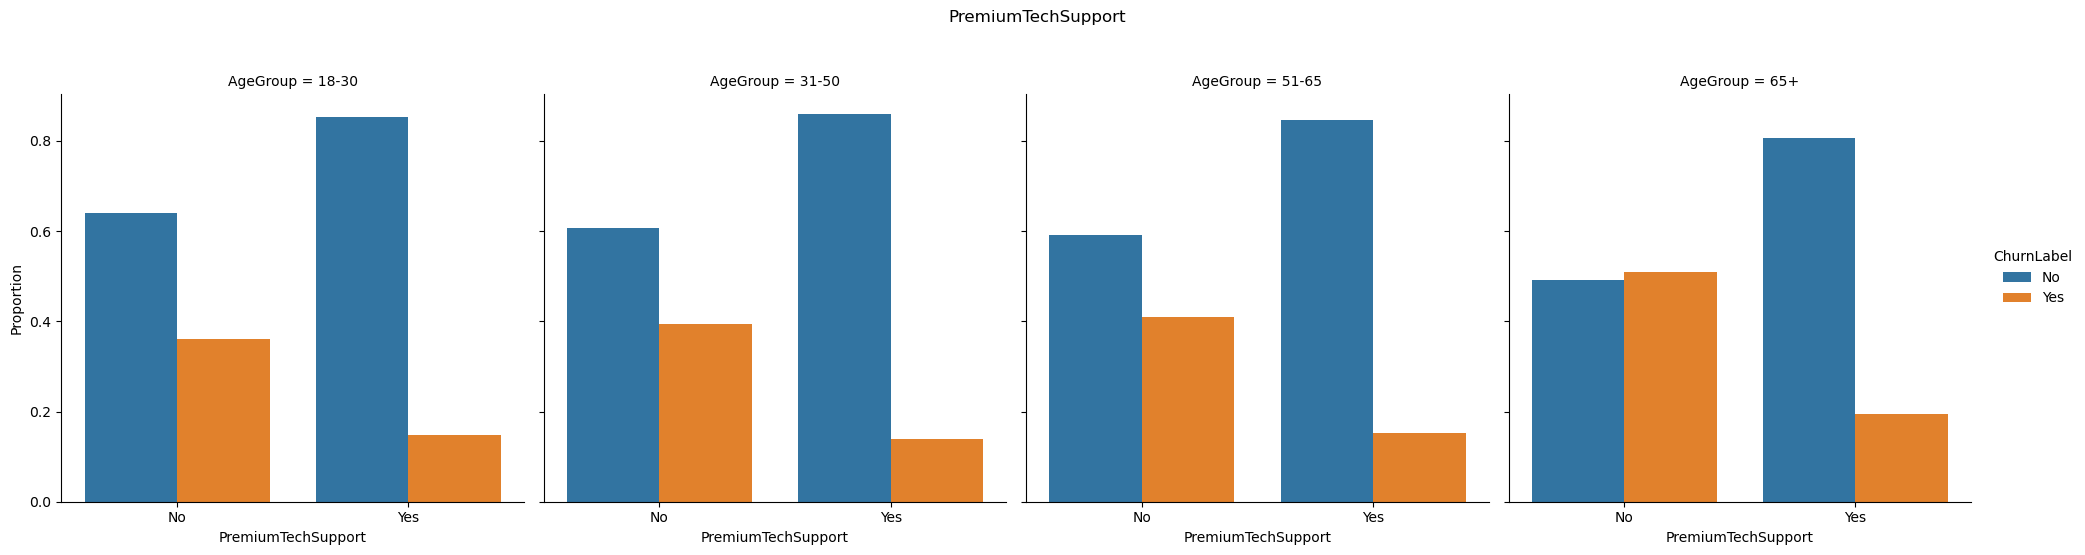

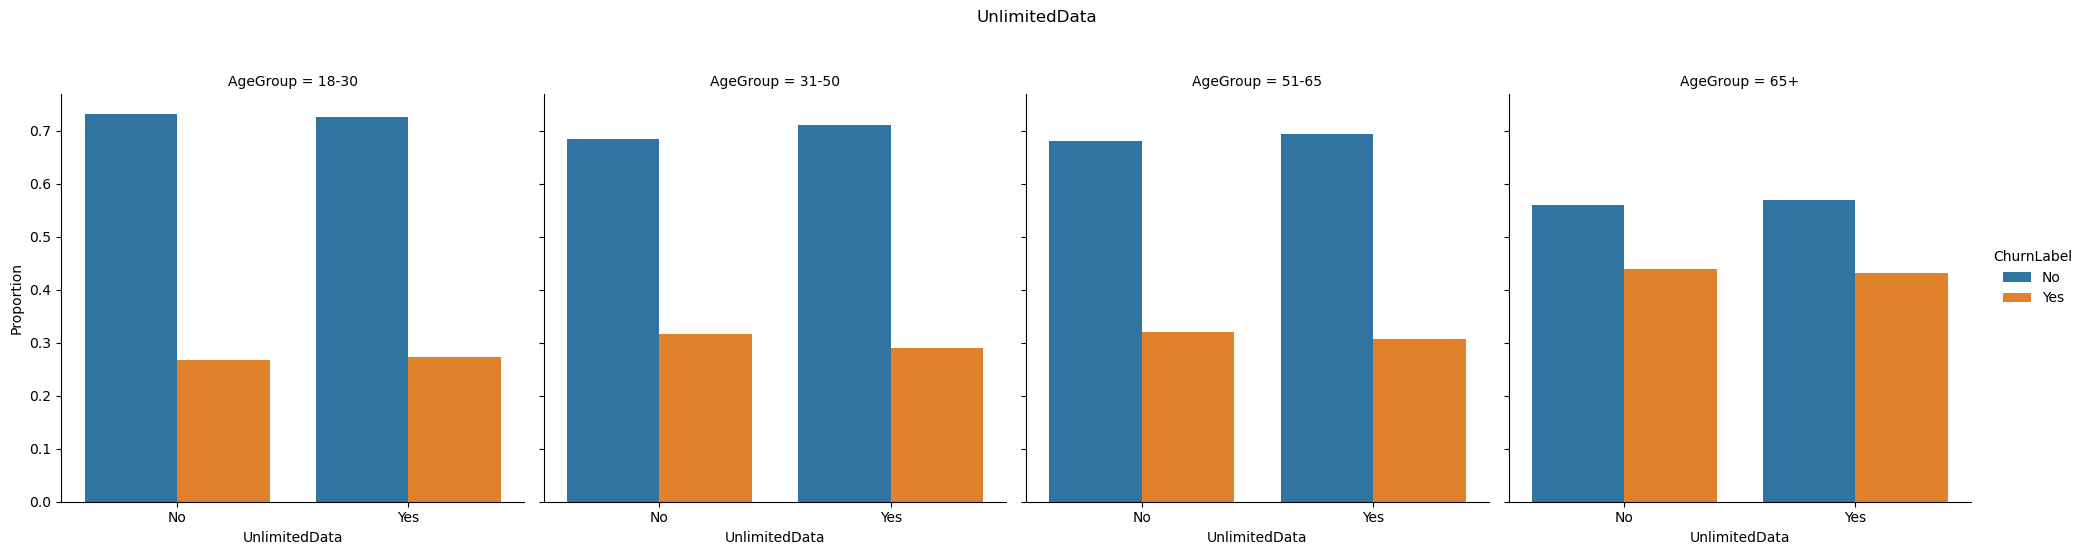

In [50]:
addonservices = ['OnlineSecurity','OnlineBackup', 'DeviceProtectionPlan', 
'PremiumTechSupport','UnlimitedData']
for service in addonservices:
    temp = (df[df.InternetService=='Yes'].groupby([service,'AgeGroup','ChurnLabel'])
            .size()
            .groupby(level=[0,1])
            .apply(lambda x: x / x.sum())
            .reset_index(name='Proportion')
           )
    #print(temp)
    sns.catplot(
        data=temp, kind='bar',
        x=service, y='Proportion', col='AgeGroup',
        hue='ChurnLabel'
    )
    plt.suptitle(service, y=1.1)
    plt.show()

When exploring how churn varies with different add-on services across age groups, similar patterns persist: customers who subscribe to add-on services generally exhibit lower churn rates, with the notable exception of unlimited data, which does not appear to significantly influence churn across any age group.
For the 65+ age group, Premium Tech Support and Online Security show a slightly stronger positive effect in reducing churn compared to other services, suggesting these offerings may better align with the needs or preferences of older customers.

**Internet Type:**

* Customers with Fiber Optic internet have the highest churn rate compared to those using DSL or Cable.
* However, the monthly charge distribution for Fiber Optic users is similar across churned and retained customers, suggesting that price alone may not explain the higher churn. This points to other potential factors such as service reliability or unmet expectations.

**Add-On Services:**

* In general, customers who subscribe to additional services (e.g., Online Security, Online Backup, Premium Tech Support) tend to have lower churn rates, indicating that bundled services may improve customer retention.
* Unlimited Data stands out as an exception — churn rates are similar regardless of whether customers opt for it, suggesting it does not significantly influence retention.
* When controlling for contract type, the impact of add-on services is more noticeable among month-to-month customers, where churn is naturally higher. For these customers, Online Security, Online Backup, and Tech Support are associated with lower churn, while Unlimited Data and Device Protection Plan show minimal effect.
* Among the 65+ age group, Premium Tech Support and Online Security appear to have a slightly stronger impact in reducing churn than other services, possibly reflecting age-specific service needs or support preferences.

### Spatial Distribution

In [51]:
ca = gpd.GeoDataFrame.from_file('/Users/joanne/Documents/Data Science Projects/ZipCodes_3170383398510875265/California_Zip_Codes.shp')

In [52]:
ca.head()

,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry
0,00012,Mt Meadows Area,CA,-99,-99.0,30.92,"POLYGON ((-235397.856 9938636.426, -235571.593..."
1,00016,Sequoia National Forest,CA,-99,-99.0,39.33,"POLYGON ((463415.330 8230735.164, 450342.706 8..."
2,00017,Northeast Fresno County,CA,-99,-99.0,564.38,"POLYGON ((354976.178 8923823.768, 354863.088 8..."
3,00018,Los Padres Ntl Forest,CA,-99,-99.0,90.83,"POLYGON ((355769.015 7866496.399, 348656.291 7..."
4,00019,Lassen Ntl Forest,CA,-99,-99.0,412.59,"POLYGON ((384.567 10127749.312, 294.796 101278..."


In [53]:
churned_count = df[df['ChurnLabel'] == 'Yes'].groupby('ZipCode').size().rename('churned_count')
total_count = df.groupby('ZipCode').size().rename('total_count')
churned = pd.concat([churned_count, total_count], axis=1).fillna(0)
churned['churned_count'] = churned['churned_count'].astype(int)
churned['churned_proportion'] = churned['churned_count'] / churned['total_count']
churned = churned.reset_index()

In [54]:
churned['ZipCode'] = churned.ZipCode.astype(str)

In [55]:
ca = pd.merge(ca, churned, left_on='ZIP_CODE', right_on='ZipCode')

<AxesSubplot:>

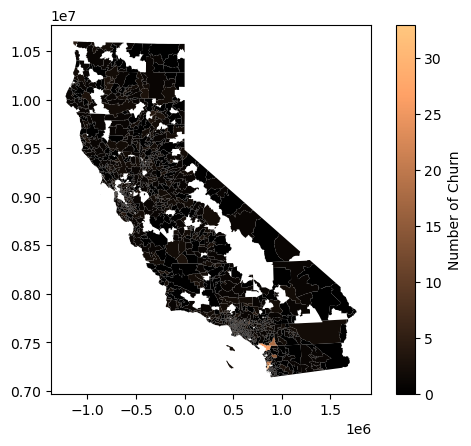

In [56]:
ca.plot(column='churned_count', cmap='copper', legend='True',
        legend_kwds={'label': "Number of Churn",'orientation': "vertical"})

There is high volume of churn in San Diego area

### San Diego Churn Reason Category

In [57]:
ca.sort_values('churned_count', ascending=False, inplace = True)

In [58]:
ca = ca.reset_index()

In [59]:
ca.head(10)

,index,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry,ZipCode,churned_count,total_count,churned_proportion
0,365,92122,San Diego,CA,46261,7522.11,6.15,"POLYGON ((867063.975 7261600.298, 865320.739 7...",92122,33,36,0.916667
1,360,92117,San Diego,CA,53204,6108.38,8.71,"POLYGON ((867699.930 7253381.906, 866912.334 7...",92117,30,34,0.882353
2,368,92126,San Diego,CA,74359,7163.68,10.38,"POLYGON ((886335.786 7282791.739, 885929.969 7...",92126,28,32,0.875000
3,321,92028,Fallbrook,CA,48626,359.87,135.12,"POLYGON ((819178.172 7479257.835, 807745.111 7...",92028,26,43,0.604651
4,353,92109,San Diego,CA,48062,6332.28,7.59,"MULTIPOLYGON (((857844.311 7226064.761, 857964...",92109,24,27,0.888889
5,372,92130,San Diego,CA,58689,3025.21,19.40,"POLYGON ((868708.929 7303336.866, 865818.635 7...",92130,20,22,0.909091
6,512,92592,Temecula,CA,78659,652.88,120.48,"POLYGON ((925053.185 7544850.142, 924634.264 7...",92592,18,30,0.600000
7,364,92121,San Diego,CA,5246,409.20,12.82,"POLYGON ((847333.358 7283563.624, 846448.225 7...",92121,17,20,0.850000
8,320,92027,Escondido,CA,58411,985.51,59.27,"POLYGON ((951478.401 7371089.170, 950169.286 7...",92027,15,38,0.394737
9,371,92129,San Diego,CA,54441,3833.87,14.20,"POLYGON ((895075.553 7308917.823, 894535.286 7...",92129,15,16,0.937500


In [60]:
df['ZipCode'] = df.ZipCode.astype(str)

In [61]:
df['SD'] = np.where((df.ZipCode.isin(ca.loc[:10,'ZipCode']))& (df.City=='San Diego'), "SD", "Not SD")

In [62]:
df[df.SD==1].ZipCode.unique()

array([], dtype=object)

In [63]:
df[(df.ChurnLabel=='Yes')].ChurnCategory.value_counts(normalize=True)

Competitor         0.449973
Attitude           0.168004
Dissatisfaction    0.162119
Price              0.112895
Other              0.107009
Name: ChurnCategory, dtype: float64

In [64]:
df[(df.SD==1)&(df.ChurnLabel=='Yes')].ChurnCategory.value_counts(normalize=True)

Series([], Name: ChurnCategory, dtype: float64)

In [65]:
df[(df.ChurnLabel=='Yes')].ChurnReason.value_counts(normalize=True)

Competitor had better devices                0.167469
Competitor made better offer                 0.166399
Attitude of support person                   0.117710
Don't know                                   0.069556
Competitor offered more data                 0.062600
Competitor offered higher download speeds    0.053505
Attitude of service provider                 0.050294
Price too high                               0.041734
Product dissatisfaction                      0.041199
Network reliability                          0.038523
Long distance charges                        0.034243
Service dissatisfaction                      0.033708
Moved                                        0.024612
Extra data charges                           0.020867
Limited range of services                    0.019797
Poor expertise of online support             0.016586
Lack of affordable download/upload speed     0.016051
Lack of self-service on Website              0.015516
Poor expertise of phone supp

In [66]:
df[(df.SD==1)&(df.ChurnLabel=='Yes')].ChurnReason.value_counts(normalize=True)

Series([], Name: ChurnReason, dtype: float64)

In [67]:
sd_churncategory =df[df.SD=='SD'].ChurnCategory.value_counts(normalize=True).reset_index()

In [68]:
sd_churncategory

,index,ChurnCategory
0,Competitor,0.880240
1,Other,0.095808
2,Attitude,0.023952


In [69]:
sd_churncategory.columns = ['Category','SD']

In [70]:
overall_churncategory =df.ChurnCategory.value_counts(normalize=True).reset_index()

In [71]:
overall_churncategory.columns = ['Category','Overall']

In [72]:
churncategory = pd.merge(overall_churncategory, sd_churncategory, on='Category', how='outer')

In [73]:
churncategory.fillna(0, inplace = True)

In [74]:
churncategory

,Category,Overall,SD
0,Competitor,0.449973,0.880240
1,Attitude,0.168004,0.023952
2,Dissatisfaction,0.162119,0.000000
3,Price,0.112895,0.000000
4,Other,0.107009,0.095808


In [75]:
sd_churnreason =df[df.SD=='SD'].ChurnReason.value_counts(normalize=True).reset_index()
sd_churnreason.columns = ['Reason','SD']
overall_churnreason =df.ChurnReason.value_counts(normalize=True).reset_index()
overall_churnreason.columns = ['Reason','Overall']
churnreason = pd.merge(sd_churnreason, overall_churnreason, on='Reason', how='outer')
churnreason.fillna(0, inplace = True)

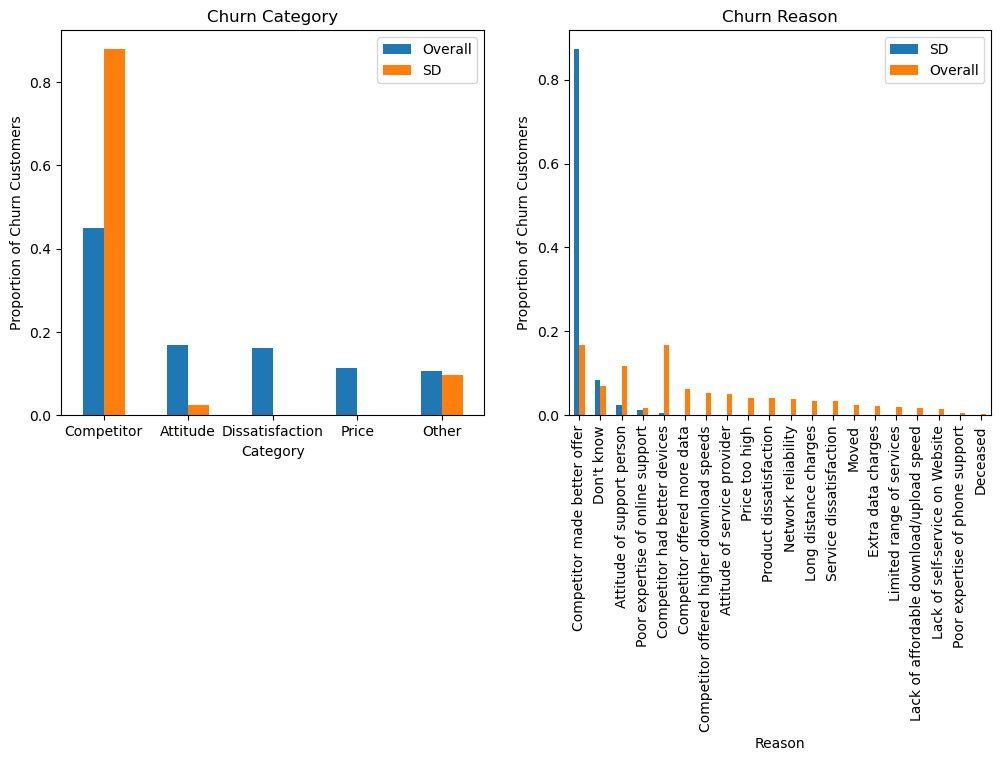

In [76]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
churncategory.plot(kind='bar', x='Category', ax=ax1)
ax1.set_title('Churn Category')
ax1.set_ylabel('Proportion of Churn Customers')
ax1.set_xticklabels(labels=churncategory.Category,rotation=0)

churnreason.plot(kind='bar', x='Reason', ax=ax2)
ax2.set_title('Churn Reason')
ax2.set_ylabel('Proportion of Churn Customers')
#ax2.set_xticklabels(labels=churnreason.Reason,rotation=0)

plt.show()


### San Diego

Churn in San Diego appears to be largely driven by competitive pressure. An overwhelming 88% of churned customers in this region cited a competitor-related reason, compared to just 45% in the overall dataset.

More specifically, 87% of San Diego churners reported that a competitor made a better offer — a sharp contrast to the 16% of broader customer base.

This pattern suggests that the high churn rate in San Diego is not primarily due to dissatisfaction with service or pricing, but rather reflects the stronger presence and more aggressive promotional strategies of competitors in this marke

## Strategic Recommendations
* Invest in onboarding and early engagement to reduce first-6-month churn.
* Encourage month-to-month customers to upgrade through personalized offers.
* Address needs of the 65+ segment with tailored support and features.
* Investigate churn causes among Fiber Optic customers beyond pricing.
* Promote high-value add-ons with proven retention impact.
* Monitor regional competition closely in churn-prone areas like San Diego.

## Next Step

1. Deeper Behavioral Segmentation
Cluster analysis using customer features (e.g., usage patterns, support tickets, payment history) to identify natural customer segments with distinct churn risk profiles.

2. Predictive Modeling
Build a churn prediction model (e.g., logistic regression, random forest, XGBoost) to estimate churn probabilities and identify top predictive features.
Use SHAP values or feature importance to explain what factors most influence churn across different segments.

3. Lifetime Value (LTV) Perspective
Pair churn analysis with customer lifetime value to identify:
Which segments are both high-value and high-risk.
Where to prioritize retention spending for greatest ROI.
4. A/B Testing Opportunities
Design and test:
Messaging campaigns to move month-to-month customers to contracts.
Add-on bundles tailored to specific age or tenure groups.
Support enhancements for 65+ customers (e.g., onboarding calls, simplified portals).
